In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import datetime
from sklearn.cluster import KMeans
from scipy.stats import skew
import warnings
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import MeanShift
from pandas_profiling import ProfileReport


D:\ML\New folder\Env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\Muhammad_Ramdhani\AppData\Local\Temp\ipykernel_5844\4077556781.py:14: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
data_diterima = pd.read_excel ('__DATA COVID 2020.xlsx')
data_diterima#tampilkan data diterima dari dinas

NOMOR            NAMA_PASIEN  UMUR JENIS_KELAMIN         Tangga_Lahir  \
0         1      ANDI SULANJANI ST  40.0             L                  NaN   
1         2  Dra. Hj. Neni Hernani  65.0             P                  NaN   
2         3        AI UUH MUHLASIH  35.0             P                  NaN   
3         4      Ardhi Ardhiansyah  40.0             L                  NaN   
4         5         Teddy Susianto  47.0             L                  NaN   
...     ...                    ...   ...           ...                  ...   
2143   2195               NURJANAH  54.0             P  1966-04-07 00:00:00   
2144   2196        NOVIA OKTAVIANI  23.0             P  1997-10-25 00:00:00   
2145   2197          YEYET SUHAETI  41.0             P  1979-01-28 00:00:00   
2146   2198     DEWI SITI PURWANTI  24.0             P           1996-08-26   
2147   2199           NOVA ALMAISA  33.0             P           1987-11-12   

                                                 ALAMAT     KELURAHAN  \
0     Jl. Taman Pahlawan RT 02 RW 01 Kel. Cikalang K...      CIKALANG   
1     Jl. Sukagalih No. 16 RT 03 RW 10 Kel. Lengkong...  LENGKONGSARI   
2     Gunung Siman RT 03 RW 06 Kel. Cigantang Kec. M...     CIGANTANG   
3     Jl. Tentara Pelajar No.74 Rt 04 Rw 08, Empangs...    EMPANGSARI   
4     Jl. RSUD No1 .RT 02 RW 012 , Empangsari, Tawan...    EMPANGSARI   
...                                                 ...           ...   
2143                      JL LASWI KEMUNING RT 01 RW 05     CIKALANG    
2144                      JL LASWI KEMUNING RT 01 RW 05     CIKALANG    
2145                           JL WINAJAYA 2 NO 25 2/10     KAHURIPAN   
2146                            KAPTEN HAJI DIDI EFENDI    EMPANGSARI   
2147                               JL. PGRI BARAT NO.14  LENGKONGSARI   

       KECAMATAN                 TEMPAT_RAWAT TANGGAL_REGISTRASI  \
0         TAWANG                      Rs. JK                 NaT   
1         TAWANG           Rs. JK (Pemulihan)                NaT   
2     MANGKUBUMI  Rs. JK (Rapid Test Positif)                NaT   
3         TAWANG             Rs. TMC (Sembuh)                NaT   
4         TAWANG                      Rs. TMC                NaT   
...          ...                          ...                ...   
2143      TAWANG                          NaN         2020-12-31   
2144      TAWANG                          NaN         2020-12-31   
2145     TAWANG                           NaN         2020-12-31   
2146      TAWANG                          NaN         2020-12-31   
2147      TAWANG                          NaN         2020-12-31   

     TANGGAL_POSITIF TANGGAL_SEMBUH TANGGAL_MENINGGAL         KETERANGAN  \
0         2020-03-24     2020-04-16               NaT                NaN   
1         2020-03-24     2020-04-16               NaT                NaN   
2         2020-03-25     2020-04-11               NaT                NaN   
3         2020-04-02     2020-06-01               NaT                NaN   
4         2020-04-02     2020-06-01               NaT                NaN   
...              ...            ...               ...                ...   
2143      2020-12-31     2021-01-14               NaT   KONTAK ERAT NOPI   
2144      2020-12-31     2021-01-14               NaT        NON CLUSTER   
2145      2020-12-31     2021-01-14               NaT  KONTAK ERAT RINI    
2146      2020-12-31     2021-01-14               NaT                NaN   
2147      2020-12-31     2021-01-14               NaT                NaN   

      simptomatik  Asimptomatik  
0             NaN           NaN  
1             NaN           NaN  
2             NaN           NaN  
3             NaN           NaN  
4             NaN           NaN  
...           ...           ...  
2143          1.0           NaN  
2144          1.0           NaN  
2145          1.0           NaN  
2146          1.0           NaN  
2147          NaN           1.0  

[2148 rows x 16 columns]

In [3]:
df = pd.read_excel ('__DATA_COVID_2020_v1B.xlsx')
df.head(20)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2147 entries, 0 to 2146
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   UMUR             2147 non-null   float64       
 1   JENIS_KELAMIN    2147 non-null   int64         
 2   KELURAHAN        2147 non-null   object        
 3   TANGGAL_POSITIF  2147 non-null   datetime64[ns]
 4   TANGGAL_SEMBUH   2147 non-null   datetime64[ns]
 5   simptomatik      2147 non-null   bool          
 6   Asimptomatik     2147 non-null   bool          
 7   Kode Kelurahan   2147 non-null   int64         
 8   Latitude         2147 non-null   int64         
 9   Longitude        2147 non-null   int64         
dtypes: bool(2), datetime64[ns](2), float64(1), int64(4), object(1)
memory usage: 138.5+ KB
None


In [4]:
df.dropna()

UMUR  JENIS_KELAMIN   KELURAHAN TANGGAL_POSITIF TANGGAL_SEMBUH  \
0     52.0              0    ARGASARI      2020-08-18     2020-09-14   
1     68.0              1    ARGASARI      2020-08-18     2020-09-07   
2     17.0              0    ARGASARI      2020-10-11     2020-11-17   
3     56.0              0    ARGASARI      2020-10-15     2020-11-17   
4     50.0              0    ARGASARI      2020-10-26     2020-12-18   
...    ...            ...         ...             ...            ...   
2142  43.0              1  YUDANAGARA      2020-09-10     2020-10-06   
2143  30.0              1  YUDANAGARA      2020-11-25     2020-12-20   
2144  56.0              1  YUDANAGARA      2020-12-01     2020-12-24   
2145  30.0              0  YUDANAGARA      2020-12-03     2020-12-25   
2146  40.0              1  YUDANAGARA      2020-12-13     2020-12-27   

      simptomatik  Asimptomatik  Kode Kelurahan  Latitude  Longitude  
0           False         False               0  -7326224  108200223  
1           False         False               0  -7326224  108200223  
2           False         False               0  -7326224  108200223  
3           False         False               0  -7326224  108200223  
4           False          True               0  -7326224  108200223  
...           ...           ...             ...       ...        ...  
2142        False         False              23  -7332715  108212523  
2143         True         False              23  -7332715  108212523  
2144         True         False              23  -7332715  108212523  
2145        False         False              23  -7332715  108212523  
2146         True         False              23  -7332715  108212523  

[2147 rows x 10 columns]

In [5]:
df['simptomatik'].replace({True:1,False:0},inplace=True)
df['simptomatik'].map({True: 1, False: 0})  
df['Asimptomatik'].replace({True:1,False:0},inplace=True)
df

UMUR  JENIS_KELAMIN   KELURAHAN TANGGAL_POSITIF TANGGAL_SEMBUH  \
0     52.0              0    ARGASARI      2020-08-18     2020-09-14   
1     68.0              1    ARGASARI      2020-08-18     2020-09-07   
2     17.0              0    ARGASARI      2020-10-11     2020-11-17   
3     56.0              0    ARGASARI      2020-10-15     2020-11-17   
4     50.0              0    ARGASARI      2020-10-26     2020-12-18   
...    ...            ...         ...             ...            ...   
2142  43.0              1  YUDANAGARA      2020-09-10     2020-10-06   
2143  30.0              1  YUDANAGARA      2020-11-25     2020-12-20   
2144  56.0              1  YUDANAGARA      2020-12-01     2020-12-24   
2145  30.0              0  YUDANAGARA      2020-12-03     2020-12-25   
2146  40.0              1  YUDANAGARA      2020-12-13     2020-12-27   

      simptomatik  Asimptomatik  Kode Kelurahan  Latitude  Longitude  
0               0             0               0  -7326224  108200223  
1               0             0               0  -7326224  108200223  
2               0             0               0  -7326224  108200223  
3               0             0               0  -7326224  108200223  
4               0             1               0  -7326224  108200223  
...           ...           ...             ...       ...        ...  
2142            0             0              23  -7332715  108212523  
2143            1             0              23  -7332715  108212523  
2144            1             0              23  -7332715  108212523  
2145            0             0              23  -7332715  108212523  
2146            1             0              23  -7332715  108212523  

[2147 rows x 10 columns]

In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2147 entries, 0 to 2146
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   UMUR             2147 non-null   float64       
 1   JENIS_KELAMIN    2147 non-null   int64         
 2   KELURAHAN        2147 non-null   object        
 3   TANGGAL_POSITIF  2147 non-null   datetime64[ns]
 4   TANGGAL_SEMBUH   2147 non-null   datetime64[ns]
 5   simptomatik      2147 non-null   int64         
 6   Asimptomatik     2147 non-null   int64         
 7   Kode Kelurahan   2147 non-null   int64         
 8   Latitude         2147 non-null   int64         
 9   Longitude        2147 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(6), object(1)
memory usage: 167.9+ KB


In [7]:
df['BULAN_POSITIF'] = pd.DatetimeIndex(df['TANGGAL_POSITIF']).month
df['Tanggal_POSITIF'] = pd.DatetimeIndex(df['TANGGAL_POSITIF']).day
df['BULAN_SEMBUH'] = pd.DatetimeIndex(df['TANGGAL_SEMBUH']).month
df['Tanggal_SEMBUH'] = pd.DatetimeIndex(df['TANGGAL_SEMBUH']).day
#df['BULAN_REGISTRASI'] = pd.DatetimeIndex(df['TANGGAL_REGISTRASI']).month
#df['TAHUN_REGISTRASI'] = pd.DatetimeIndex(df['TANGGAL_REGISTRASI']).year
df

UMUR  JENIS_KELAMIN   KELURAHAN TANGGAL_POSITIF TANGGAL_SEMBUH  \
0     52.0              0    ARGASARI      2020-08-18     2020-09-14   
1     68.0              1    ARGASARI      2020-08-18     2020-09-07   
2     17.0              0    ARGASARI      2020-10-11     2020-11-17   
3     56.0              0    ARGASARI      2020-10-15     2020-11-17   
4     50.0              0    ARGASARI      2020-10-26     2020-12-18   
...    ...            ...         ...             ...            ...   
2142  43.0              1  YUDANAGARA      2020-09-10     2020-10-06   
2143  30.0              1  YUDANAGARA      2020-11-25     2020-12-20   
2144  56.0              1  YUDANAGARA      2020-12-01     2020-12-24   
2145  30.0              0  YUDANAGARA      2020-12-03     2020-12-25   
2146  40.0              1  YUDANAGARA      2020-12-13     2020-12-27   

      simptomatik  Asimptomatik  Kode Kelurahan  Latitude  Longitude  \
0               0             0               0  -7326224  108200223   
1               0             0               0  -7326224  108200223   
2               0             0               0  -7326224  108200223   
3               0             0               0  -7326224  108200223   
4               0             1               0  -7326224  108200223   
...           ...           ...             ...       ...        ...   
2142            0             0              23  -7332715  108212523   
2143            1             0              23  -7332715  108212523   
2144            1             0              23  -7332715  108212523   
2145            0             0              23  -7332715  108212523   
2146            1             0              23  -7332715  108212523   

      BULAN_POSITIF  Tanggal_POSITIF  BULAN_SEMBUH  Tanggal_SEMBUH  
0                 8               18             9              14  
1                 8               18             9               7  
2                10               11            11              17  
3                10               15            11              17  
4                10               26            12              18  
...             ...              ...           ...             ...  
2142              9               10            10               6  
2143             11               25            12              20  
2144             12                1            12              24  
2145             12                3            12              25  
2146             12               13            12              27  

[2147 rows x 14 columns]

In [8]:
#df.fillna(method='ffill', inplace=True)
df.fillna(0)

UMUR  JENIS_KELAMIN   KELURAHAN TANGGAL_POSITIF TANGGAL_SEMBUH  \
0     52.0              0    ARGASARI      2020-08-18     2020-09-14   
1     68.0              1    ARGASARI      2020-08-18     2020-09-07   
2     17.0              0    ARGASARI      2020-10-11     2020-11-17   
3     56.0              0    ARGASARI      2020-10-15     2020-11-17   
4     50.0              0    ARGASARI      2020-10-26     2020-12-18   
...    ...            ...         ...             ...            ...   
2142  43.0              1  YUDANAGARA      2020-09-10     2020-10-06   
2143  30.0              1  YUDANAGARA      2020-11-25     2020-12-20   
2144  56.0              1  YUDANAGARA      2020-12-01     2020-12-24   
2145  30.0              0  YUDANAGARA      2020-12-03     2020-12-25   
2146  40.0              1  YUDANAGARA      2020-12-13     2020-12-27   

      simptomatik  Asimptomatik  Kode Kelurahan  Latitude  Longitude  \
0               0             0               0  -7326224  108200223   
1               0             0               0  -7326224  108200223   
2               0             0               0  -7326224  108200223   
3               0             0               0  -7326224  108200223   
4               0             1               0  -7326224  108200223   
...           ...           ...             ...       ...        ...   
2142            0             0              23  -7332715  108212523   
2143            1             0              23  -7332715  108212523   
2144            1             0              23  -7332715  108212523   
2145            0             0              23  -7332715  108212523   
2146            1             0              23  -7332715  108212523   

      BULAN_POSITIF  Tanggal_POSITIF  BULAN_SEMBUH  Tanggal_SEMBUH  
0                 8               18             9              14  
1                 8               18             9               7  
2                10               11            11              17  
3                10               15            11              17  
4                10               26            12              18  
...             ...              ...           ...             ...  
2142              9               10            10               6  
2143             11               25            12              20  
2144             12                1            12              24  
2145             12                3            12              25  
2146             12               13            12              27  

[2147 rows x 14 columns]

In [9]:

df1=df.copy()

In [10]:
df1=df1.drop(['TANGGAL_POSITIF','TANGGAL_SEMBUH'], axis = 1)#hapus kolom
df1

UMUR  JENIS_KELAMIN   KELURAHAN  simptomatik  Asimptomatik  \
0     52.0              0    ARGASARI            0             0   
1     68.0              1    ARGASARI            0             0   
2     17.0              0    ARGASARI            0             0   
3     56.0              0    ARGASARI            0             0   
4     50.0              0    ARGASARI            0             1   
...    ...            ...         ...          ...           ...   
2142  43.0              1  YUDANAGARA            0             0   
2143  30.0              1  YUDANAGARA            1             0   
2144  56.0              1  YUDANAGARA            1             0   
2145  30.0              0  YUDANAGARA            0             0   
2146  40.0              1  YUDANAGARA            1             0   

      Kode Kelurahan  Latitude  Longitude  BULAN_POSITIF  Tanggal_POSITIF  \
0                  0  -7326224  108200223              8               18   
1                  0  -7326224  108200223              8               18   
2                  0  -7326224  108200223             10               11   
3                  0  -7326224  108200223             10               15   
4                  0  -7326224  108200223             10               26   
...              ...       ...        ...            ...              ...   
2142              23  -7332715  108212523              9               10   
2143              23  -7332715  108212523             11               25   
2144              23  -7332715  108212523             12                1   
2145              23  -7332715  108212523             12                3   
2146              23  -7332715  108212523             12               13   

      BULAN_SEMBUH  Tanggal_SEMBUH  
0                9              14  
1                9               7  
2               11              17  
3               11              17  
4               12              18  
...            ...             ...  
2142            10               6  
2143            12              20  
2144            12              24  
2145            12              25  
2146            12              27  

[2147 rows x 12 columns]

C:\Users\Muhammad_Ramdhani\AppData\Local\Temp\ipykernel_5844\471573778.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True, fmt='.2g');


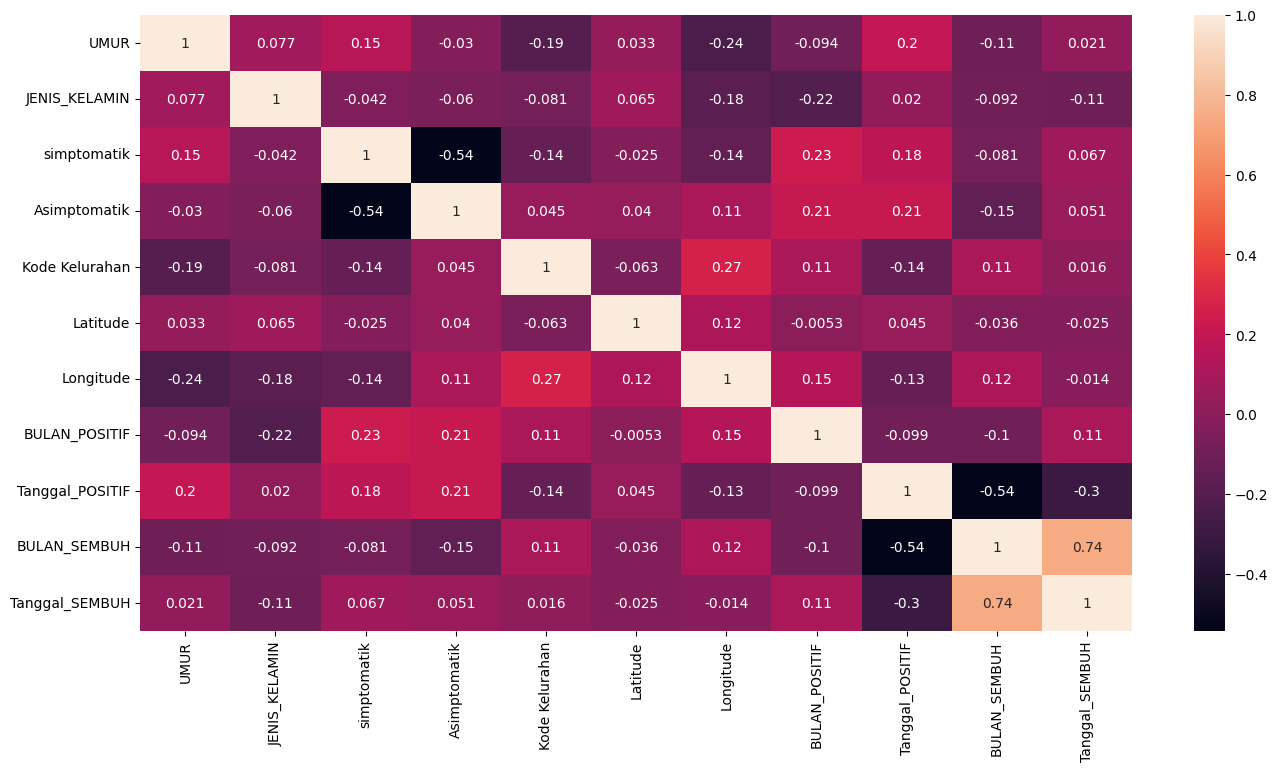

In [11]:
fig, ax = plt.subplots(figsize=(16,8))
sns.heatmap(df1.corr(), annot=True, fmt='.2g');

In [12]:
df1.describe()

UMUR  JENIS_KELAMIN  simptomatik  Asimptomatik  Kode Kelurahan  \
count  2147.000000    2147.000000  2147.000000   2147.000000     2147.000000   
mean     32.028562       0.398230     0.326036      0.386586       42.933861   
std      17.628468       0.489647     0.468870      0.487081       19.569322   
min       0.200000       0.000000     0.000000      0.000000        0.000000   
25%      17.000000       0.000000     0.000000      0.000000       28.000000   
50%      28.000000       0.000000     0.000000      0.000000       50.000000   
75%      46.000000       1.000000     1.000000      1.000000       56.000000   
max     123.000000       1.000000     1.000000      1.000000       93.000000   

           Latitude     Longitude  BULAN_POSITIF  Tanggal_POSITIF  \
count  2.147000e+03  2.147000e+03    2147.000000      2147.000000   
mean  -7.349271e+06  1.082222e+08      11.318584        14.997671   
std    4.035206e+04  2.984434e+04       1.258353         8.638084   
min   -7.614470e+06  1.080723e+08       3.000000         1.000000   
25%   -7.357527e+06  1.082030e+08      11.000000         9.000000   
50%   -7.355125e+06  1.082230e+08      12.000000        14.000000   
75%   -7.331360e+06  1.082529e+08      12.000000        23.000000   
max   -7.173330e+06  1.082814e+08      12.000000        31.000000   

       BULAN_SEMBUH  Tanggal_SEMBUH  
count   2147.000000     2147.000000  
mean       8.969259       17.984164  
std        4.541820        9.178652  
min        1.000000        1.000000  
25%        7.000000       13.000000  
50%       12.000000       16.000000  
75%       12.000000       27.000000  
max       12.000000       31.000000

In [13]:
#df['JENIS_KELAMIN'] = df['JENIS_KELAMIN'].astype(int)
#df['simptomatik'] = df['simptomatik'].astype(int)
#df['Asimptomatik'] = df['Asimptomatik'].astype(int)
"""
df['KODE_KELURAHAN'] = df['KODE_KELURAHAN'].astype(int)
df['BULAN_POSITIF'] = df['BULAN_POSITIF'].astype(int)
df['TAHUN_POSITIF'] = df['TAHUN_POSITIF'].astype(int)
df['BULAN_SEMBUH'] = df['BULAN_SEMBUH'].astype(int)
df['TAHUN_SEMBUH'] = df['TAHUN_SEMBUH'].astype(int)
df['BULAN_REGISTRASI'] = df['BULAN_REGISTRASI'].astype(int)
df['TAHUN_REGISTRASI'] = df['TAHUN_REGISTRASI'].astype(int)"""

"\ndf['KODE_KELURAHAN'] = df['KODE_KELURAHAN'].astype(int)\ndf['BULAN_POSITIF'] = df['BULAN_POSITIF'].astype(int)\ndf['TAHUN_POSITIF'] = df['TAHUN_POSITIF'].astype(int)\ndf['BULAN_SEMBUH'] = df['BULAN_SEMBUH'].astype(int)\ndf['TAHUN_SEMBUH'] = df['TAHUN_SEMBUH'].astype(int)\ndf['BULAN_REGISTRASI'] = df['BULAN_REGISTRASI'].astype(int)\ndf['TAHUN_REGISTRASI'] = df['TAHUN_REGISTRASI'].astype(int)"

In [14]:
def remove_outlier(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~(df>(Q1-(1.5*IQR)))|(df<(Q3+(1.5*IQR)))]
    return df_final
for x in range(2):
    df1=remove_outlier(df1)
    df1.dropna(axis=0,inplace=True)

C:\Users\Muhammad_Ramdhani\AppData\Local\Temp\ipykernel_5844\1121507375.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1=df.quantile(0.25)
C:\Users\Muhammad_Ramdhani\AppData\Local\Temp\ipykernel_5844\1121507375.py:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3=df.quantile(0.75)
C:\Users\Muhammad_Ramdhani\AppData\Local\Temp\ipykernel_5844\1121507375.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_final=df[~(df>(Q1-(1.5*IQR)))|(df<(Q3+(1.5*IQR)))]


In [15]:
df1.to_excel("data_covid_bersihT.xlsx",index=False) 

In [16]:
terbaru = pd.read_excel ('data_covid_bersihT.xlsx')

In [17]:
terbaru2=terbaru.copy()
terbaru#tampikan after

UMUR  JENIS_KELAMIN   KELURAHAN  simptomatik  Asimptomatik  \
0     52.0              0    ARGASARI            0             0   
1     68.0              1    ARGASARI            0             0   
2     17.0              0    ARGASARI            0             0   
3     56.0              0    ARGASARI            0             0   
4     50.0              0    ARGASARI            0             1   
...    ...            ...         ...          ...           ...   
2063  43.0              1  YUDANAGARA            0             0   
2064  30.0              1  YUDANAGARA            1             0   
2065  56.0              1  YUDANAGARA            1             0   
2066  30.0              0  YUDANAGARA            0             0   
2067  40.0              1  YUDANAGARA            1             0   

      Kode Kelurahan  Latitude  Longitude  BULAN_POSITIF  Tanggal_POSITIF  \
0                  0  -7326224  108200223              8               18   
1                  0  -7326224  108200223              8               18   
2                  0  -7326224  108200223             10               11   
3                  0  -7326224  108200223             10               15   
4                  0  -7326224  108200223             10               26   
...              ...       ...        ...            ...              ...   
2063              23  -7332715  108212523              9               10   
2064              23  -7332715  108212523             11               25   
2065              23  -7332715  108212523             12                1   
2066              23  -7332715  108212523             12                3   
2067              23  -7332715  108212523             12               13   

      BULAN_SEMBUH  Tanggal_SEMBUH  
0                9              14  
1                9               7  
2               11              17  
3               11              17  
4               12              18  
...            ...             ...  
2063            10               6  
2064            12              20  
2065            12              24  
2066            12              25  
2067            12              27  

[2068 rows x 12 columns]

In [18]:
df2=df1.copy()
df2

UMUR  JENIS_KELAMIN   KELURAHAN  simptomatik  Asimptomatik  \
0     52.0              0    ARGASARI            0             0   
1     68.0              1    ARGASARI            0             0   
2     17.0              0    ARGASARI            0             0   
3     56.0              0    ARGASARI            0             0   
4     50.0              0    ARGASARI            0             1   
...    ...            ...         ...          ...           ...   
2142  43.0              1  YUDANAGARA            0             0   
2143  30.0              1  YUDANAGARA            1             0   
2144  56.0              1  YUDANAGARA            1             0   
2145  30.0              0  YUDANAGARA            0             0   
2146  40.0              1  YUDANAGARA            1             0   

      Kode Kelurahan   Latitude  Longitude  BULAN_POSITIF  Tanggal_POSITIF  \
0                  0 -7326224.0  108200223              8               18   
1                  0 -7326224.0  108200223              8               18   
2                  0 -7326224.0  108200223             10               11   
3                  0 -7326224.0  108200223             10               15   
4                  0 -7326224.0  108200223             10               26   
...              ...        ...        ...            ...              ...   
2142              23 -7332715.0  108212523              9               10   
2143              23 -7332715.0  108212523             11               25   
2144              23 -7332715.0  108212523             12                1   
2145              23 -7332715.0  108212523             12                3   
2146              23 -7332715.0  108212523             12               13   

      BULAN_SEMBUH  Tanggal_SEMBUH  
0                9              14  
1                9               7  
2               11              17  
3               11              17  
4               12              18  
...            ...             ...  
2142            10               6  
2143            12              20  
2144            12              24  
2145            12              25  
2146            12              27  

[2068 rows x 12 columns]

In [19]:
#df2.drop(['Latitude','Longitude','KELURAHAN'], axis = 1)#hapus kolom
df2.drop(['Latitude','Longitude','KELURAHAN'],axis=1, inplace=True)
#tambah ini

In [20]:
#minmax
df2["UMUR"] = (df2["UMUR"] - df2["UMUR"].min()) / (df2["UMUR"].max()-df2["UMUR"].min())
df2["JENIS_KELAMIN"] = (df2["JENIS_KELAMIN"] - df2["JENIS_KELAMIN"].min()) / (df2["JENIS_KELAMIN"].max()-df2["JENIS_KELAMIN"].min())
df2["simptomatik"] = (df2["simptomatik"] - df2["simptomatik"].min()) / (df2["simptomatik"].max()-df2["simptomatik"].min())
df2["Asimptomatik"] = (df2["Asimptomatik"] - df2["Asimptomatik"].min()) / (df2["Asimptomatik"].max()-df2["Asimptomatik"].min())
df2["Kode Kelurahan"] = (df2["Kode Kelurahan"] - df2["Kode Kelurahan"].min()) / (df2["Kode Kelurahan"].max()-df2["Kode Kelurahan"].min())
df2["BULAN_POSITIF"] = (df2["BULAN_POSITIF"] - df2["BULAN_POSITIF"].min()) / (df2["BULAN_POSITIF"].max()-df2["BULAN_POSITIF"].min())
df2["Tanggal_POSITIF"] = (df2["Tanggal_POSITIF"] - df2["Tanggal_POSITIF"].min()) / (df2["Tanggal_POSITIF"].max()-df2["Tanggal_POSITIF"].min())
df2["BULAN_SEMBUH"] = (df2["BULAN_SEMBUH"] - df2["BULAN_SEMBUH"].min()) / (df2["BULAN_SEMBUH"].max()-df2["BULAN_SEMBUH"].min())
df2["Tanggal_SEMBUH"] = (df2["Tanggal_SEMBUH"] - df2["Tanggal_SEMBUH"].min()) / (df2["Tanggal_SEMBUH"].max()-df2["Tanggal_SEMBUH"].min())
df2 #tmabah ini dan tampilkan "data masuk ke mechine lerning"

UMUR  JENIS_KELAMIN  simptomatik  Asimptomatik  Kode Kelurahan  \
0     0.583333            0.0          0.0           0.0            0.00   
1     0.763514            1.0          0.0           0.0            0.00   
2     0.189189            0.0          0.0           0.0            0.00   
3     0.628378            0.0          0.0           0.0            0.00   
4     0.560811            0.0          0.0           1.0            0.00   
...        ...            ...          ...           ...             ...   
2142  0.481982            1.0          0.0           0.0            0.25   
2143  0.335586            1.0          1.0           0.0            0.25   
2144  0.628378            1.0          1.0           0.0            0.25   
2145  0.335586            0.0          0.0           0.0            0.25   
2146  0.448198            1.0          1.0           0.0            0.25   

      BULAN_POSITIF  Tanggal_POSITIF  BULAN_SEMBUH  Tanggal_SEMBUH  
0          0.555556         0.566667      0.727273        0.433333  
1          0.555556         0.566667      0.727273        0.200000  
2          0.777778         0.333333      0.909091        0.533333  
3          0.777778         0.466667      0.909091        0.533333  
4          0.777778         0.833333      1.000000        0.566667  
...             ...              ...           ...             ...  
2142       0.666667         0.300000      0.818182        0.166667  
2143       0.888889         0.800000      1.000000        0.633333  
2144       1.000000         0.000000      1.000000        0.766667  
2145       1.000000         0.066667      1.000000        0.800000  
2146       1.000000         0.400000      1.000000        0.866667  

[2068 rows x 9 columns]

df2.to_excel("Data_add_ML.xlsx",index=False) 

 Data_ML= pd.read_excel ('Data_add_ML.xlsx')

 Data_ML

In [21]:

sc = StandardScaler()
df_std = sc.fit_transform(df2)
df_std

array([[ 1.17920768, -0.8073148 , -0.69381219, ...,  0.35735833,
         0.00213864, -0.43162416],
       [ 2.10529526,  1.23867418, -0.69381219, ...,  0.35735833,
         0.00213864, -1.19546174],
       [-0.8466089 , -0.8073148 , -0.69381219, ..., -0.45132061,
         0.44440857, -0.1042652 ],
       ...,
       [ 1.41072958,  1.23867418,  1.44131223, ..., -1.60657624,
         0.66554353,  0.65957237],
       [-0.09416274, -0.8073148 , -0.69381219, ..., -1.37552511,
         0.66554353,  0.76869203],
       [ 0.484642  ,  1.23867418,  1.44131223, ..., -0.22026948,
         0.66554353,  0.98693134]])

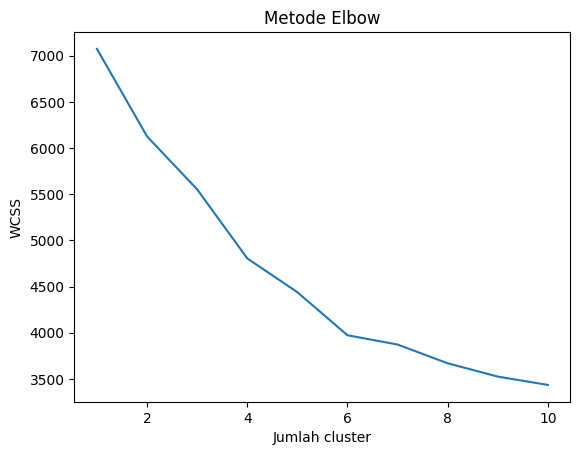

In [22]:
#elbow methot
wcss = []
for i in range(1, 11):
  kmedoids = KMedoids(n_clusters = i, init = 'k-medoids++', random_state=42)
  kmedoids.fit(df_std)
  wcss.append(kmedoids.inertia_)
plt.plot(range(1, 11), wcss)
plt.title("Metode Elbow")
plt.xlabel("Jumlah cluster")
plt.ylabel("WCSS")
plt.show()




D:\ML\New folder\Env\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
D:\ML\New folder\Env\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
D:\ML\New folder\Env\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
D:\ML\New folder\Env\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
D:\ML\New folder\Env\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
D:\ML\New folder\Env\lib\site-packages\sklearn\manifold

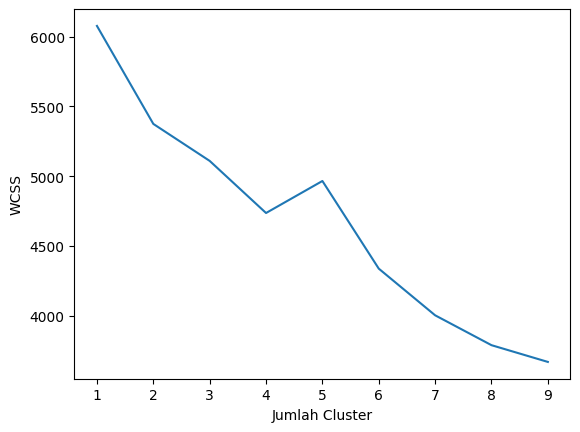

In [23]:
# Menentukan jumlah cluster yang akan diuji
n_clusters = range(1, 10)

# Menyimpan nilai wcss untuk setiap jumlah cluster
wcss = []

# Melakukan proses clustering dan menentukan nilai wcss
for i in n_clusters:
    model = SpectralClustering(n_clusters=i, eigen_solver=None, n_components=None,
                   random_state=74, n_init=10, gamma=1.0, affinity='nearest_neighbors'
                   , n_neighbors=10, eigen_tol=0.0, assign_labels='discretize',
                   degree=3, coef0=1, kernel_params=None, n_jobs=None, verbose=False)
    labels = model.fit_predict(df_std)
    centroids = np.array([df_std[labels == j].mean(axis=0) for j in range(i)])
    distances = np.min(np.sqrt(((df_std[:, np.newaxis] - centroids) ** 2).sum(axis=2)), axis=1)
    wcss.append(np.sum(distances))

# Menggambar grafik wcss vs jumlah cluster
plt.plot(n_clusters, wcss)
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()


In [24]:
Spectralclustering = SpectralClustering(n_clusters=6, eigen_solver=None, n_components=None,
                   random_state=74, n_init=10, gamma=1.0, affinity='nearest_neighbors'
                   , n_neighbors=10, eigen_tol=0.0, assign_labels='discretize',
                   degree=3, coef0=1, kernel_params=None, n_jobs=None, verbose=False).fit(df_std)# rubah yang ini

D:\ML\New folder\Env\lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [25]:
kmedoid = KMedoids(n_clusters=6, random_state=24,method='pam',).fit(df_std) #rubah yang ini

D:\ML\New folder\Env\lib\site-packages\sklearn_extra\cluster\_k_medoids.py:243: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [26]:
Spectral= Spectralclustering.labels_
terbaru['hasil_Spectral']=Spectral
KM= kmedoid.labels_
terbaru['hasil_Kmedoid']=KM
terbaru

UMUR  JENIS_KELAMIN   KELURAHAN  simptomatik  Asimptomatik  \
0     52.0              0    ARGASARI            0             0   
1     68.0              1    ARGASARI            0             0   
2     17.0              0    ARGASARI            0             0   
3     56.0              0    ARGASARI            0             0   
4     50.0              0    ARGASARI            0             1   
...    ...            ...         ...          ...           ...   
2063  43.0              1  YUDANAGARA            0             0   
2064  30.0              1  YUDANAGARA            1             0   
2065  56.0              1  YUDANAGARA            1             0   
2066  30.0              0  YUDANAGARA            0             0   
2067  40.0              1  YUDANAGARA            1             0   

      Kode Kelurahan  Latitude  Longitude  BULAN_POSITIF  Tanggal_POSITIF  \
0                  0  -7326224  108200223              8               18   
1                  0  -7326224  108200223              8               18   
2                  0  -7326224  108200223             10               11   
3                  0  -7326224  108200223             10               15   
4                  0  -7326224  108200223             10               26   
...              ...       ...        ...            ...              ...   
2063              23  -7332715  108212523              9               10   
2064              23  -7332715  108212523             11               25   
2065              23  -7332715  108212523             12                1   
2066              23  -7332715  108212523             12                3   
2067              23  -7332715  108212523             12               13   

      BULAN_SEMBUH  Tanggal_SEMBUH  hasil_Spectral  hasil_Kmedoid  
0                9              14               0              4  
1                9               7               0              4  
2               11              17               0              4  
3               11              17               0              4  
4               12              18               3              0  
...            ...             ...             ...            ...  
2063            10               6               0              4  
2064            12              20               0              3  
2065            12              24               0              3  
2066            12              25               0              5  
2067            12              27               0              3  

[2068 rows x 14 columns]

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    sc = SpectralClustering(n_clusters=num_clusters, eigen_solver=None, n_components=None,
                   random_state=24, n_init=10, gamma=1.0, affinity='nearest_neighbors'
                   , n_neighbors=10, eigen_tol=0.0, assign_labels='discretize',
                   degree=3, coef0=1, kernel_params=None, n_jobs=None, verbose=False)
    sc.fit(df_std)
    
    cluster_labels = sc.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df_std, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    #gak perlu ditambahkan

range_n_clusterss = [2, 3, 4, 5, 6, 7, 8]

for num_clusterss in range_n_clusterss:
    
    # intialise kmeans
    kme = KMedoids(n_clusters=num_clusterss, random_state=24,method='pam')
    kme.fit(df_std)
    
    cluster_labelss = kme.labels_
    
    # silhouette score
    silhouette_avgs = silhouette_score(df_std, cluster_labelss)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusterss, silhouette_avgs))
    #gak perlu ditambahkan

In [27]:
terbaru.to_excel("Spectral_VS_Kmedoid.xlsx",index=False)#hasil download
terbaru=pd.read_excel ('Spectral_VS_Kmedoid.xlsx')
terbaru#tampilkan hasil 


UMUR  JENIS_KELAMIN   KELURAHAN  simptomatik  Asimptomatik  \
0     52.0              0    ARGASARI            0             0   
1     68.0              1    ARGASARI            0             0   
2     17.0              0    ARGASARI            0             0   
3     56.0              0    ARGASARI            0             0   
4     50.0              0    ARGASARI            0             1   
...    ...            ...         ...          ...           ...   
2063  43.0              1  YUDANAGARA            0             0   
2064  30.0              1  YUDANAGARA            1             0   
2065  56.0              1  YUDANAGARA            1             0   
2066  30.0              0  YUDANAGARA            0             0   
2067  40.0              1  YUDANAGARA            1             0   

      Kode Kelurahan  Latitude  Longitude  BULAN_POSITIF  Tanggal_POSITIF  \
0                  0  -7326224  108200223              8               18   
1                  0  -7326224  108200223              8               18   
2                  0  -7326224  108200223             10               11   
3                  0  -7326224  108200223             10               15   
4                  0  -7326224  108200223             10               26   
...              ...       ...        ...            ...              ...   
2063              23  -7332715  108212523              9               10   
2064              23  -7332715  108212523             11               25   
2065              23  -7332715  108212523             12                1   
2066              23  -7332715  108212523             12                3   
2067              23  -7332715  108212523             12               13   

      BULAN_SEMBUH  Tanggal_SEMBUH  hasil_Spectral  hasil_Kmedoid  
0                9              14               0              4  
1                9               7               0              4  
2               11              17               0              4  
3               11              17               0              4  
4               12              18               3              0  
...            ...             ...             ...            ...  
2063            10               6               0              4  
2064            12              20               0              3  
2065            12              24               0              3  
2066            12              25               0              5  
2067            12              27               0              3  

[2068 rows x 14 columns]

In [28]:
profile = ProfileReport(terbaru, title="Spectral and Kmedoidt")
profile.to_file("Spectral_VS_Kmedoid.html")#hasil download

Export report to file: 100%|█████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 43.52it/s]


In [29]:
terbaru3=terbaru2.copy()


Cluster_Spectral
---


In [30]:
terbaru2['Cluster_Spectral']=Spectral

In [31]:
cluster0 = terbaru2[terbaru2['Cluster_Spectral'] == 0]
cluster1 = terbaru2[terbaru2['Cluster_Spectral'] == 1]
cluster2 = terbaru2[terbaru2['Cluster_Spectral'] == 2]
cluster3 = terbaru2[terbaru2['Cluster_Spectral'] == 3]
cluster4 = terbaru2[terbaru2['Cluster_Spectral'] == 4]
cluster5 = terbaru2[terbaru2['Cluster_Spectral'] == 5]


cluster0.to_excel("Cluster_Spectral0.xlsx")#hasil download
cluster1.to_excel("Cluster_Spectral1.xlsx")#hasil download
cluster2.to_excel("Cluster_Spectral2.xlsx")#hasil download
cluster3.to_excel("Cluster_Spectral3.xlsx")#hasil download
cluster4.to_excel("Cluster_Spectral4.xlsx")#hasil download
cluster5.to_excel("Cluster_Spectral5.xlsx")#hasil download



In [32]:
Spectral0 = pd.read_excel('Cluster_Spectral0.xlsx')
Spectral1 = pd.read_excel('Cluster_Spectral1.xlsx')
Spectral2 = pd.read_excel('Cluster_Spectral2.xlsx')
Spectral3 = pd.read_excel('Cluster_Spectral3.xlsx')
Spectral4 = pd.read_excel('Cluster_Spectral4.xlsx')
Spectral5 = pd.read_excel('Cluster_Spectral5.xlsx')



In [33]:
Spectral0#tampilkan 

Unnamed: 0  UMUR  JENIS_KELAMIN   KELURAHAN  simptomatik  Asimptomatik  \
0             0  52.0              0    ARGASARI            0             0   
1             1  68.0              1    ARGASARI            0             0   
2             2  17.0              0    ARGASARI            0             0   
3             3  56.0              0    ARGASARI            0             0   
4             5  49.0              0    ARGASARI            0             0   
..          ...   ...            ...         ...          ...           ...   
838        2063  43.0              1  YUDANAGARA            0             0   
839        2064  30.0              1  YUDANAGARA            1             0   
840        2065  56.0              1  YUDANAGARA            1             0   
841        2066  30.0              0  YUDANAGARA            0             0   
842        2067  40.0              1  YUDANAGARA            1             0   

     Kode Kelurahan  Latitude  Longitude  BULAN_POSITIF  Tanggal_POSITIF  \
0                 0  -7326224  108200223              8               18   
1                 0  -7326224  108200223              8               18   
2                 0  -7326224  108200223             10               11   
3                 0  -7326224  108200223             10               15   
4                 0  -7326224  108200223             11               12   
..              ...       ...        ...            ...              ...   
838              23  -7332715  108212523              9               10   
839              23  -7332715  108212523             11               25   
840              23  -7332715  108212523             12                1   
841              23  -7332715  108212523             12                3   
842              23  -7332715  108212523             12               13   

     BULAN_SEMBUH  Tanggal_SEMBUH  Cluster_Spectral  
0               9              14                 0  
1               9               7                 0  
2              11              17                 0  
3              11              17                 0  
4              12              14                 0  
..            ...             ...               ...  
838            10               6                 0  
839            12              20                 0  
840            12              24                 0  
841            12              25                 0  
842            12              27                 0  

[843 rows x 14 columns]

In [34]:
Spectral1#tampilkan 

Unnamed: 0  UMUR  JENIS_KELAMIN   KELURAHAN  simptomatik  Asimptomatik  \
0            45    34              0  BANTARSARI            1             0   
1            72    23              0     CIBEUTI            1             0   
2            73    53              0     CIBEUTI            1             0   
3            79    25              0     CIBEUTI            1             0   
4            84    78              0     CIBEUTI            1             0   
..          ...   ...            ...         ...          ...           ...   
134        1986    13              1    TUGURAJA            0             0   
135        1987    13              1    TUGURAJA            0             0   
136        2042    42              0    TUGURAJA            1             0   
137        2046    39              0    TUGURAJA            1             0   
138        2048    45              0    TUGURAJA            1             0   

     Kode Kelurahan  Latitude  Longitude  BULAN_POSITIF  Tanggal_POSITIF  \
0                 3  -7327590  108181580             12               18   
1                 7  -7384290  108187850             12               18   
2                 7  -7384290  108187850             12               18   
3                 7  -7384290  108187850             12               22   
4                 7  -7384290  108187850             12               26   
..              ...       ...        ...            ...              ...   
134              50  -7341184  108203024             10                2   
135              50  -7341184  108203024             10                2   
136              50  -7341184  108203024             12               18   
137              50  -7341184  108203024             12               26   
138              50  -7341184  108203024             12               26   

     BULAN_SEMBUH  Tanggal_SEMBUH  Cluster_Spectral  
0               1               1                 1  
1               1               1                 1  
2               1               1                 1  
3               1               5                 1  
4               1               9                 1  
..            ...             ...               ...  
134            10              15                 1  
135            10              15                 1  
136             1               1                 1  
137             1               9                 1  
138             1               9                 1  

[139 rows x 14 columns]

In [35]:
Spectral2#tampilkan 

Unnamed: 0  UMUR  JENIS_KELAMIN   KELURAHAN  simptomatik  Asimptomatik  \
0            46  32.0              0  BANTARSARI            0             1   
1            47  37.0              0  BANTARSARI            0             1   
2            48  18.0              0  BANTARSARI            0             1   
3            49  10.0              0  BANTARSARI            0             1   
4            50  55.0              1  BANTARSARI            0             1   
..          ...   ...            ...         ...          ...           ...   
287        2045  70.0              0    TUGURAJA            0             1   
288        2050  20.0              1    TUGURAJA            0             1   
289        2052  28.0              0        URUG            0             1   
290        2054  65.0              0        URUG            0             1   
291        2055   3.0              0        URUG            0             1   

     Kode Kelurahan  Latitude  Longitude  BULAN_POSITIF  Tanggal_POSITIF  \
0                 3  -7327590  108181580             12               22   
1                 3  -7327590  108181580             12               22   
2                 3  -7327590  108181580             12               23   
3                 3  -7327590  108181580             12               24   
4                 3  -7327590  108181580             12               26   
..              ...       ...        ...            ...              ...   
287              50  -7341184  108203024             12               23   
288              50  -7341184  108203024             12               31   
289              71  -7426060  108204440             12               24   
290              71  -7426060  108204440             12               30   
291              71  -7426060  108204440             12               30   

     BULAN_SEMBUH  Tanggal_SEMBUH  Cluster_Spectral  
0               1               5                 2  
1               1               5                 2  
2               1               6                 2  
3               1               7                 2  
4               1               9                 2  
..            ...             ...               ...  
287             1               6                 2  
288             1              14                 2  
289             1               7                 2  
290             1              13                 2  
291             1              13                 2  

[292 rows x 14 columns]

In [36]:
Spectral3#tampilkan 

Unnamed: 0  UMUR  JENIS_KELAMIN KELURAHAN  simptomatik  Asimptomatik  \
0             4  50.0              0  ARGASARI            0             1   
1             8  40.0              0  ARGASARI            1             0   
2            11  26.0              0  ARGASARI            0             1   
3            14  42.0              0  ARGASARI            0             1   
4            15  19.0              0  ARGASARI            0             1   
..          ...   ...            ...       ...          ...           ...   
683        2037  26.0              0  TUGURAJA            0             1   
684        2038  15.0              0  TUGURAJA            0             1   
685        2041  43.0              0  TUGURAJA            1             0   
686        2051  55.0              0      URUG            0             1   
687        2056  31.0              0     URUG             1             0   

     Kode Kelurahan  Latitude  Longitude  BULAN_POSITIF  Tanggal_POSITIF  \
0                 0  -7326224  108200223             10               26   
1                 0  -7326224  108200223             12                2   
2                 0  -7326224  108200223             12                4   
3                 0  -7326224  108200223             12               10   
4                 0  -7326224  108200223             12               10   
..              ...       ...        ...            ...              ...   
683              50  -7341184  108203024             12               14   
684              50  -7341184  108203024             12               14   
685              50  -7341184  108203024             12               17   
686              71  -7426060  108204440             11                3   
687              71  -7426060  108204440             11               20   

     BULAN_SEMBUH  Tanggal_SEMBUH  Cluster_Spectral  
0              12              18                 3  
1              12              15                 3  
2              12              25                 3  
3              12              30                 3  
4              12              30                 3  
..            ...             ...               ...  
683            12              28                 3  
684            12              28                 3  
685            12              31                 3  
686            11              18                 3  
687            12              19                 3  

[688 rows x 14 columns]

In [37]:
Spectral4#tampilkan 

Unnamed: 0  UMUR  JENIS_KELAMIN    KELURAHAN  simptomatik  Asimptomatik  \
0         1080    14              0  SETIANAGARA            0             0   
1         1106    14              0  SETIANAGARA            0             0   
2         1107    14              0  SETIANAGARA            0             0   
3         1109    14              0  SETIANAGARA            0             0   
4         1119    14              0  SETIANAGARA            0             0   
5         1120    14              0  SETIANAGARA            0             0   
6         1123    14              0  SETIANAGARA            0             0   
7         1125    14              0  SETIANAGARA            0             0   
8         1147    14              0  SETIANAGARA            0             0   
9         1150    14              0  SETIANAGARA            0             0   
10        1174    14              0  SETIANAGARA            0             0   
11        1207    14              0  SETIANAGARA            0             0   
12        1208    14              0  SETIANAGARA            0             0   
13        1238    14              0  SETIANAGARA            0             0   
14        1247    14              0  SETIANAGARA            0             0   
15        1258    14              0  SETIANAGARA            0             0   

    Kode Kelurahan  Latitude  Longitude  BULAN_POSITIF  Tanggal_POSITIF  \
0               56  -7357527  108252867             12                3   
1               56  -7357527  108252867             12                3   
2               56  -7357527  108252867             12                3   
3               56  -7357527  108252867             12                3   
4               56  -7357527  108252867             12                3   
5               56  -7357527  108252867             12                3   
6               56  -7357527  108252867             12                3   
7               56  -7357527  108252867             12                3   
8               56  -7357527  108252867             12                3   
9               56  -7357527  108252867             12                3   
10              56  -7357527  108252867             12                3   
11              56  -7357527  108252867             12                3   
12              56  -7357527  108252867             12                3   
13              56  -7357527  108252867             12                3   
14              56  -7357527  108252867             12                3   
15              56  -7357527  108252867             12                3   

    BULAN_SEMBUH  Tanggal_SEMBUH  Cluster_Spectral  
0             12              15                 4  
1             12              15                 4  
2             12              15                 4  
3             12              15                 4  
4             12              15                 4  
5             12              15                 4  
6             12              15                 4  
7             12              15                 4  
8             12              15                 4  
9             12              15                 4  
10            12              15                 4  
11            12              15                 4  
12            12              15                 4  
13            12              15                 4  
14            12              15                 4  
15            12              15                 4

In [38]:
Spectral5#tampilkan 

Unnamed: 0  UMUR  JENIS_KELAMIN   KELURAHAN  simptomatik  Asimptomatik  \
0           44    51              1  BANTARSARI            1             0   
1           63    55              1  BUNGURSARI            1             0   
2           76    53              1     CIBEUTI            1             0   
3           82    36              1     CIBEUTI            1             0   
4           83    79              1     CIBEUTI            1             0   
..         ...   ...            ...         ...          ...           ...   
85        1876    59              1    TUGUJAYA            1             0   
86        2040    56              1    TUGURAJA            1             0   
87        2047    51              1    TUGURAJA            1             0   
88        2049    29              1    TUGURAJA            1             0   
89        2053    57              1        URUG            1             0   

    Kode Kelurahan  Latitude  Longitude  BULAN_POSITIF  Tanggal_POSITIF  \
0                3  -7327590  108181580             12               18   
1                4  -7302730  108165350             12               19   
2                7  -7384290  108187850             12               18   
3                7  -7384290  108187850             12               23   
4                7  -7384290  108187850             12               26   
..             ...       ...        ...            ...              ...   
85              26  -7346633  108201577             12               28   
86              50  -7341184  108203024             12               18   
87              50  -7341184  108203024             12               23   
88              50  -7341184  108203024             12               31   
89              71  -7426060  108204440             12               30   

    BULAN_SEMBUH  Tanggal_SEMBUH  Cluster_Spectral  
0              1               1                 5  
1              1               2                 5  
2              1               1                 5  
3              1               6                 5  
4              1               9                 5  
..           ...             ...               ...  
85             1              11                 5  
86             1               1                 5  
87             1               6                 5  
88             1              14                 5  
89             1              13                 5  

[90 rows x 14 columns]

Cluster_Kmedoid
----

In [39]:
terbaru3['Cluster_Kmedoid']=KM



In [40]:
classtering0 = terbaru3[terbaru3['Cluster_Kmedoid'] == 0]
classtering1 = terbaru3[terbaru3['Cluster_Kmedoid'] == 1]
classtering2 = terbaru3[terbaru3['Cluster_Kmedoid'] == 2]
classtering3 = terbaru3[terbaru3['Cluster_Kmedoid'] == 3]
classtering4 = terbaru3[terbaru3['Cluster_Kmedoid'] == 4]
classtering5 = terbaru3[terbaru3['Cluster_Kmedoid'] == 5]
classtering0.to_excel("Cluster_Kmedoid0.xlsx")#hasil download
classtering1.to_excel("Cluster_Kmedoid1.xlsx")#hasil download
classtering2.to_excel("Cluster_Kmedoid2.xlsx")#hasil download
classtering3.to_excel("Cluster_Kmedoid3.xlsx")#hasil download
classtering4.to_excel("Cluster_Kmedoid4.xlsx")#hasil download
classtering5.to_excel("Cluster_Kmedoid5.xlsx")#hasil download

#perbarui ini 

In [41]:
Kmedoid0 = pd.read_excel('Cluster_Kmedoid0.xlsx')
Kmedoid1 = pd.read_excel('Cluster_Kmedoid1.xlsx')
Kmedoid2 = pd.read_excel('Cluster_Kmedoid2.xlsx')
Kmedoid3 = pd.read_excel('Cluster_Kmedoid3.xlsx')
Kmedoid4 = pd.read_excel('Cluster_Kmedoid4.xlsx')
Kmedoid5 = pd.read_excel('Cluster_Kmedoid5.xlsx')

#perbaru ini

In [42]:
Kmedoid0#tampilkan 

Unnamed: 0  UMUR  JENIS_KELAMIN   KELURAHAN  simptomatik  Asimptomatik  \
0             4  50.0              0    ARGASARI            0             1   
1            46  32.0              0  BANTARSARI            0             1   
2            47  37.0              0  BANTARSARI            0             1   
3            48  18.0              0  BANTARSARI            0             1   
4            49  10.0              0  BANTARSARI            0             1   
..          ...   ...            ...         ...          ...           ...   
270        2045  70.0              0    TUGURAJA            0             1   
271        2050  20.0              1    TUGURAJA            0             1   
272        2052  28.0              0        URUG            0             1   
273        2054  65.0              0        URUG            0             1   
274        2055   3.0              0        URUG            0             1   

     Kode Kelurahan  Latitude  Longitude  BULAN_POSITIF  Tanggal_POSITIF  \
0                 0  -7326224  108200223             10               26   
1                 3  -7327590  108181580             12               22   
2                 3  -7327590  108181580             12               22   
3                 3  -7327590  108181580             12               23   
4                 3  -7327590  108181580             12               24   
..              ...       ...        ...            ...              ...   
270              50  -7341184  108203024             12               23   
271              50  -7341184  108203024             12               31   
272              71  -7426060  108204440             12               24   
273              71  -7426060  108204440             12               30   
274              71  -7426060  108204440             12               30   

     BULAN_SEMBUH  Tanggal_SEMBUH  Cluster_Kmedoid  
0              12              18                0  
1               1               5                0  
2               1               5                0  
3               1               6                0  
4               1               7                0  
..            ...             ...              ...  
270             1               6                0  
271             1              14                0  
272             1               7                0  
273             1              13                0  
274             1              13                0  

[275 rows x 14 columns]

In [43]:
Kmedoid1#tampilkan 

Unnamed: 0  UMUR  JENIS_KELAMIN   KELURAHAN  simptomatik  Asimptomatik  \
0            44    51              1  BANTARSARI            1             0   
1            45    34              0  BANTARSARI            1             0   
2            63    55              1  BUNGURSARI            1             0   
3            72    23              0     CIBEUTI            1             0   
4            73    53              0     CIBEUTI            1             0   
..          ...   ...            ...         ...          ...           ...   
209        2046    39              0    TUGURAJA            1             0   
210        2047    51              1    TUGURAJA            1             0   
211        2048    45              0    TUGURAJA            1             0   
212        2049    29              1    TUGURAJA            1             0   
213        2053    57              1        URUG            1             0   

     Kode Kelurahan  Latitude  Longitude  BULAN_POSITIF  Tanggal_POSITIF  \
0                 3  -7327590  108181580             12               18   
1                 3  -7327590  108181580             12               18   
2                 4  -7302730  108165350             12               19   
3                 7  -7384290  108187850             12               18   
4                 7  -7384290  108187850             12               18   
..              ...       ...        ...            ...              ...   
209              50  -7341184  108203024             12               26   
210              50  -7341184  108203024             12               23   
211              50  -7341184  108203024             12               26   
212              50  -7341184  108203024             12               31   
213              71  -7426060  108204440             12               30   

     BULAN_SEMBUH  Tanggal_SEMBUH  Cluster_Kmedoid  
0               1               1                1  
1               1               1                1  
2               1               2                1  
3               1               1                1  
4               1               1                1  
..            ...             ...              ...  
209             1               9                1  
210             1               6                1  
211             1               9                1  
212             1              14                1  
213             1              13                1  

[214 rows x 14 columns]

In [44]:
Kmedoid2#tampilkan 

Unnamed: 0  UMUR  JENIS_KELAMIN KELURAHAN  simptomatik  Asimptomatik  \
0            11  26.0              0  ARGASARI            0             1   
1            14  42.0              0  ARGASARI            0             1   
2            15  19.0              0  ARGASARI            0             1   
3            28  25.0              0   AWIPARI            0             1   
4            30  39.0              0   AWIPARI            0             1   
..          ...   ...            ...       ...          ...           ...   
430        2036  71.0              0  TUGURAJA            0             1   
431        2037  26.0              0  TUGURAJA            0             1   
432        2038  15.0              0  TUGURAJA            0             1   
433        2039  38.0              1  TUGURAJA            0             1   
434        2051  55.0              0      URUG            0             1   

     Kode Kelurahan  Latitude  Longitude  BULAN_POSITIF  Tanggal_POSITIF  \
0                 0  -7326224  108200223             12                4   
1                 0  -7326224  108200223             12               10   
2                 0  -7326224  108200223             12               10   
3                 2  -7352780  108270683             11               25   
4                 2  -7352780  108270683             12               13   
..              ...       ...        ...            ...              ...   
430              50  -7341184  108203024             12               14   
431              50  -7341184  108203024             12               14   
432              50  -7341184  108203024             12               14   
433              50  -7341184  108203024             12               14   
434              71  -7426060  108204440             11                3   

     BULAN_SEMBUH  Tanggal_SEMBUH  Cluster_Kmedoid  
0              12              25                2  
1              12              30                2  
2              12              30                2  
3              12              20                2  
4              12              27                2  
..            ...             ...              ...  
430            12              28                2  
431            12              28                2  
432            12              28                2  
433            12              28                2  
434            11              18                2  

[435 rows x 14 columns]

In [45]:
Kmedoid3#tampilkan 

Unnamed: 0  UMUR  JENIS_KELAMIN   KELURAHAN  simptomatik  Asimptomatik  \
0             7  53.0              1    ARGASARI            1             0   
1             8  40.0              0    ARGASARI            1             0   
2            16  61.0              0    ARGASARI            1             0   
3            17  78.0              1    ARGASARI            1             0   
4            18  30.0              0    ARGASARI            1             0   
..          ...   ...            ...         ...          ...           ...   
444        2041  43.0              0    TUGURAJA            1             0   
445        2056  31.0              0       URUG             1             0   
446        2064  30.0              1  YUDANAGARA            1             0   
447        2065  56.0              1  YUDANAGARA            1             0   
448        2067  40.0              1  YUDANAGARA            1             0   

     Kode Kelurahan  Latitude  Longitude  BULAN_POSITIF  Tanggal_POSITIF  \
0                 0  -7326224  108200223             11               28   
1                 0  -7326224  108200223             12                2   
2                 0  -7326224  108200223             12               10   
3                 0  -7326224  108200223             12               10   
4                 0  -7326224  108200223             12               10   
..              ...       ...        ...            ...              ...   
444              50  -7341184  108203024             12               17   
445              71  -7426060  108204440             11               20   
446              23  -7332715  108212523             11               25   
447              23  -7332715  108212523             12                1   
448              23  -7332715  108212523             12               13   

     BULAN_SEMBUH  Tanggal_SEMBUH  Cluster_Kmedoid  
0              12              20                3  
1              12              15                3  
2              12              30                3  
3              12              30                3  
4              12              30                3  
..            ...             ...              ...  
444            12              31                3  
445            12              19                3  
446            12              20                3  
447            12              24                3  
448            12              27                3  

[449 rows x 14 columns]

In [46]:
Kmedoid4#tampilkan 

Unnamed: 0  UMUR  JENIS_KELAMIN   KELURAHAN  simptomatik  Asimptomatik  \
0             0  52.0              0    ARGASARI            0             0   
1             1  68.0              1    ARGASARI            0             0   
2             2  17.0              0    ARGASARI            0             0   
3             3  56.0              0    ARGASARI            0             0   
4             5  49.0              0    ARGASARI            0             0   
..          ...   ...            ...         ...          ...           ...   
437        2059  66.0              1  YUDANAGARA            0             0   
438        2060  28.0              1  YUDANAGARA            0             0   
439        2061  44.0              0  YUDANAGARA            0             0   
440        2062  70.0              0  YUDANAGARA            0             0   
441        2063  43.0              1  YUDANAGARA            0             0   

     Kode Kelurahan  Latitude  Longitude  BULAN_POSITIF  Tanggal_POSITIF  \
0                 0  -7326224  108200223              8               18   
1                 0  -7326224  108200223              8               18   
2                 0  -7326224  108200223             10               11   
3                 0  -7326224  108200223             10               15   
4                 0  -7326224  108200223             11               12   
..              ...       ...        ...            ...              ...   
437              23  -7332715  108212523              4               17   
438              23  -7332715  108212523              7               15   
439              23  -7332715  108212523              9                9   
440              23  -7332715  108212523              9                9   
441              23  -7332715  108212523              9               10   

     BULAN_SEMBUH  Tanggal_SEMBUH  Cluster_Kmedoid  
0               9              14                4  
1               9               7                4  
2              11              17                4  
3              11              17                4  
4              12              14                4  
..            ...             ...              ...  
437             6               1                4  
438             7              21                4  
439             9              19                4  
440             9              19                4  
441            10               6                4  

[442 rows x 14 columns]

In [47]:
Kmedoid5#tampilkan 

Unnamed: 0  UMUR  JENIS_KELAMIN   KELURAHAN  simptomatik  Asimptomatik  \
0            56    23              0  BUNGURSARI            0             0   
1           117    33              0    CIHERANG            0             0   
2           148    22              0    CIKALANG            0             0   
3           149    26              0    CIKALANG            0             0   
4           150    29              0    CIKALANG            0             0   
..          ...   ...            ...         ...          ...           ...   
248        1988    29              0    TUGURAJA            0             0   
249        2010    40              0    TUGURAJA            0             0   
250        2018    21              0    TUGURAJA            0             0   
251        2027    30              0    TUGURAJA            0             0   
252        2066    30              0  YUDANAGARA            0             0   

     Kode Kelurahan  Latitude  Longitude  BULAN_POSITIF  Tanggal_POSITIF  \
0                 4  -7302730  108165350             12                3   
1                10  -7372330  108265090             12                3   
2                11  -7339800  108232140             12                2   
3                11  -7339800  108232140             12                2   
4                11  -7339800  108232140             12                3   
..              ...       ...        ...            ...              ...   
248              50  -7341184  108203024             10                3   
249              50  -7341184  108203024             10                5   
250              50  -7341184  108203024             10                9   
251              50  -7341184  108203024             12                2   
252              23  -7332715  108212523             12                3   

     BULAN_SEMBUH  Tanggal_SEMBUH  Cluster_Kmedoid  
0              12              25                5  
1              12              25                5  
2              12              15                5  
3              12              15                5  
4              12              25                5  
..            ...             ...              ...  
248            10              20                5  
249            10              19                5  
250            10              24                5  
251            12              15                5  
252            12              25                5  

[253 rows x 14 columns]